In [157]:
from selenium import webdriver # 제어가 가능한 Webdriver 크롬 브라우저
from selenium.webdriver.common.by import By # select를 위한 선택자(CCS,ID,CLASS,NAME, XPATH 등)
from selenium.webdriver.common.keys import Keys # 키보드에 있는 키를 사용하기 위한 모듈
import time
from bs4 import BeautifulSoup
import requests

driver = webdriver.Chrome()

In [158]:
url = 'https://www.saramin.co.kr/zf_user/jobs/list/job-category'

driver.get(url)

여러 옵션 선택

In [159]:
# 경력 선택(신입)
career_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[1]/button')
career_elm.click()
career_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[1]/div/div[1]/div[1]/label')
career_elm.click()

In [160]:
# 학력 선택(무관)
edu_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[2]/button')
edu_elm.click()
edu_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[2]/div/div[1]/div/label')
edu_elm.click()

In [161]:
# 지역 선택 (서울 전체)
loc_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[2]/ul/li[2]/button')
loc_elm.click()
loc_elm = driver.find_element(By.XPATH, '//*[@id="sp_area_lastDepth_101000"]/li[1]/div/label')
loc_elm.click()

In [162]:
# 직업 선택(IT개발, 데이터)
job_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[2]/ul/li[1]/button/span[1]')
job_elm.click()
job_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[2]/div/div[1]/div[2]/div[1]/button[6]')
job_elm.click()
job_elm = driver.find_element(By.XPATH, '//*[@id="sp_job_category_subDepth_2"]/div[1]/label')
job_elm.click()

In [163]:
# 검색하기 버튼 클릭
search_elm = driver.find_element(By.XPATH, '//*[@id="search_btn"]')
search_elm.click()

In [164]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [165]:
len(soup.select('.str_tit'))

100

In [166]:
co = [i.text for i in soup.select('.str_tit')]
co

['\n                            (주)진앤현시큐리티                        ',
 '[진앤현보안그룹] 금융권 IT보안운영 정규직채용(SC증권)',
 '\n                            (주)아이리스브라이트                        ',
 '영상/BX웹디자인/CS/바이럴/촬영팀/SCM/글로벌사업팀',
 '\n                            (주)희림종합건축사사무소                        ',
 '건축,도시,조경설계/친환경건축/웹퍼블리셔/총무팀/CM PJT 현장',
 '\n                            주식회사 투위드                        ',
 '[(주)투위드] DB보안 S/W 엔지니어 모집',
 '\n                            메가스터디교육(주)                        ',
 '학원 웹개발자 채용',
 '\n                            (주)헥스콘                        ',
 '[헥스콘] 디자인/마케팅 기반 노코드 프로랜서 모집',
 '\n                            넷킬러(주)                        ',
 '넷킬러, 구글 Google 클라우드 솔루션 영업팀 (Sales), 신입/경력 정규직 채용',
 '\n                            (주)위버시스템즈                        ',
 '부문별 신입/경력 수시 채용 모집(무선/유선 네트워크엔지니어, 영업매니저)',
 '\n                            (주)에프앤비네트웍스                        ',
 '[장애인전형] IT업체 퍼블리셔 채용',
 '\n                            대상정보기술(주)                        ',


In [167]:
import re
company_names = [re.sub(r'[\n\r()]', '', job.strip()) for i, job in enumerate(co) if i % 2 == 0]
company_names

['주진앤현시큐리티',
 '주아이리스브라이트',
 '주희림종합건축사사무소',
 '주식회사 투위드',
 '메가스터디교육주',
 '주헥스콘',
 '넷킬러주',
 '주위버시스템즈',
 '주에프앤비네트웍스',
 '대상정보기술주',
 '주엔젤로보틱스',
 '주동곡기정',
 '주밸류플러스',
 '주트루빈스',
 '주신화시스템',
 '사단법인국제앰네스티한국지부',
 '인라이프케어이종협동조합연합회',
 '주토닥',
 '주토닥',
 '아이헤이트플라잉버그스주',
 '주크레온유니티',
 '모바일이지배하는세상주',
 '주에니아이',
 '주크레온유니티',
 '주이노메트리',
 '주크레온유니티',
 '주머큐리',
 '주베이직테크',
 '주가우포토',
 '주잼퍼블릭',
 '주이큐브랩',
 '주알피바이오',
 '주에스이에스',
 '사보험개발원',
 '라온시큐어주',
 '주드림어스컴퍼니',
 '현대차증권주',
 '대한상공회의소',
 '주아이엔지스토리',
 '주아이엔지스토리',
 '주이공이공',
 '파크시스템스주',
 '우리에프아이에스주',
 '주제일엔지니어링종합건축사사무소',
 '케이티커머스주',
 '모래시계의원',
 '주스마트비전',
 '주피코이노베이션',
 '주오토스윙',
 '라온시큐어주']

In [168]:
stacks = [stack.find('span').text for stack in soup.select('.job_sector')]
stacks

['정보보안',
 '퍼블리셔',
 '웹개발',
 '데이터엔지니어',
 '백엔드/서버개발',
 '퍼블리셔',
 '보안컨설팅',
 '기술지원',
 '백엔드/서버개발',
 '데이터분석가',
 '기술지원',
 '기술지원',
 'S/W',
 '데이터분석가',
 '기술지원',
 '유지보수',
 '백엔드/서버개발',
 'SE(시스템엔지니어)',
 'H/W',
 '데이터분석가',
 '기술지원',
 '앱개발',
 'QA/테스터',
 '기술지원',
 'S/W',
 '기술지원',
 '임베디드',
 '기술지원',
 '기술지원',
 'GM(게임운영)',
 '데이터엔지니어',
 '기술지원',
 'SAP',
 '보안컨설팅',
 '기술지원',
 '임베디드',
 '기술지원',
 '보안컨설팅',
 '웹개발',
 '유지보수',
 '솔루션',
 '데이터엔지니어',
 '기술지원',
 '기술지원',
 '기술지원',
 '영상처리',
 '기술지원',
 '데이터엔지니어',
 '네트워크',
 '앱개발']

In [169]:
company = [soup.select('.str_tit')[i].text.strip() for i in range(0,len(soup.select('.str_tit')),2)]
title = [soup.select('.str_tit')[i].text.strip() for i in range(1,len(soup.select('.str_tit')),2)]
stacks = []
for i in soup.select('.job_sector'):
    st = []
    for j in i.select('span'):
        st.append(j.text)
    stacks.append(st)
loc = [i.text for i in soup.select('.work_place')]
career = [i.text for i in soup.select('.career')]
edu = [i.text for i in soup.select('.education')]
last_date = [i.text for i in soup.select('.support_detail>.date')]
input_date = [i.text for i in soup.select('.deadlines')]
main_url = 'https://www.saramin.co.kr'
link = [main_url + i['href'] for i in soup.select('.job_tit>.str_tit')]

In [170]:
print(len(company), len(title), len(stacks), len(loc), len(career), len(edu), len(last_date), len(input_date), len(link))

50 50 50 50 50 50 50 50 50


In [23]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [171]:
import pandas as pd

dic = {
    'Company': company,
    'Title': title,
    'Stacks': stacks,
    'Location': loc,
    'Career': career,
    'Education': edu,
    'Last Date': last_date,
    'Input Date': input_date,
    'Link': link
}

df = pd.DataFrame(dic)
df


,Company,Title,Stacks,Location,Career,Education,Last Date,Input Date,Link
0,(주)진앤현시큐리티,[진앤현보안그룹] 금융권 IT보안운영 정규직채용(SC증권),"[정보보안, SE(시스템엔지니어), 방화벽, 솔루션, VPN]",서울 종로구,신입 · 경력 · 정규직,학력무관,~05.05(일),16분 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
1,(주)아이리스브라이트,영상/BX웹디자인/CS/바이럴/촬영팀/SCM/글로벌사업팀,"[퍼블리셔, HTML, HTML5, Java, Javascript]",서울 강남구 외,신입 · 경력 · 정규직 외,학력무관,내일마감,12일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
2,(주)희림종합건축사사무소,"건축,도시,조경설계/친환경건축/웹퍼블리셔/총무팀/CM PJT 현장","[웹개발, 웹마스터, 퍼블리셔, 영상처리, 웹표준·웹접근성]",서울전체 외,신입 · 경력 · 정규직 외,학력무관,~03.31(일),9일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
3,주식회사 투위드,[(주)투위드] DB보안 S/W 엔지니어 모집,"[데이터엔지니어, 유지보수, DBMS, S/W, C++]",서울 송파구,신입 · 정규직,학력무관,채용시,20분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
4,메가스터디교육(주),학원 웹개발자 채용,"[백엔드/서버개발, 웹개발, 퍼블리셔, 프론트엔드, DBA]",서울전체 외,신입 · 경력 · 정규직,학력무관,~03.31(일),23분 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
5,(주)헥스콘,[헥스콘] 디자인/마케팅 기반 노코드 프로랜서 모집,"[퍼블리셔, 액션스크립트, CSS, HTML, 그래픽디자인]",서울전체 외,경력무관 · 프리랜서,학력무관,~04.05(금),25분 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
6,넷킬러(주),"넷킬러, 구글 Google 클라우드 솔루션 영업팀 (Sales), 신입/경력 정규직 채용","[보안컨설팅, 정보보안, 솔루션, 클라우드, 문서작성]",서울 중구 외,신입 · 경력 · 정규직,학력무관,D-7,6일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
7,(주)위버시스템즈,"부문별 신입/경력 수시 채용 모집(무선/유선 네트워크엔지니어, 영업매니저)","[기술지원, 백엔드/서버개발, 보안컨설팅, 앱개발, 유지보수]",서울전체 외,신입 · 경력 · 정규직,학력무관,D-7,6일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
8,(주)에프앤비네트웍스,[장애인전형] IT업체 퍼블리셔 채용,"[백엔드/서버개발, 웹개발, 퍼블리셔, CSS, HTML5]",서울 금천구 외,경력무관 · 계약직,학력무관,~03.22(금),47분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
9,대상정보기술(주),[대상정보기술] 각 부문별 경력·신입 채용,"[데이터분석가, 데이터엔지니어, 보안컨설팅, 웹개발, 유지보수]",서울 광진구,신입 · 경력 · 정규직,학력무관,~03.31(일),54분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...


In [172]:
curr_url = driver.current_url
sp_url = curr_url.split('job-category?')
i = 3
page_url = sp_url[0] + f'job-category?page={i}&' + sp_url[1]

page_url

'https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=3&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y'

In [173]:
base_url = "https://www.saramin.co.kr/zf_user/jobs/list/job-category?page={}&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y"

for i in range(2, 21):
    page_url = base_url.format(i)
    print(page_url)

https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=2&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y
https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=3&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y
https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=4&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y
https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=5&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y
https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=6&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y
https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=7&exp_cd=1&edu_none=y&l

In [174]:
res = requests.get(page_url)
if res.status_code == 200:
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')

In [175]:
tc_elm = driver.find_element(By.XPATH, '//*[@id="content"]/div[5]/div/div[1]/span/em')
total_count = int(tc_elm.text)

page_cnt = total_count//50+1
print(page_cnt)


20


In [176]:
# 내가 만든 거

# 데이터프레임 초기화
df = pd.DataFrame()

for i in range(1, page_cnt + 1):
    # 페이지 URL 수정
    page_url = f"https://www.saramin.co.kr/zf_user/jobs/list/job-category?page={i}&exp_cd=1&edu_none=y&loc_mcd=101000&cat_mcls=2&search_optional_item=y&search_done=y&panel_count=y&preview=y&isAjaxRequest=0&page_count=50&sort=RL&type=job-category&is_param=1&isSearchResultEmpty=1&isSectionHome=0&searchParamCount=4&tab=job-category#searchTitle"
    # 페이지로 이동
    driver.get(page_url)
    time.sleep(2)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    company = [soup.select('.str_tit')[i].text.strip() for i in range(0,len(soup.select('.str_tit')),2)]
    title = [soup.select('.str_tit')[i].text.strip() for i in range(1,len(soup.select('.str_tit')),2)]
    stacks = []
    for i in soup.select('.job_sector'):
        st = []
        for j in i.select('span'):
            st.append(j.text)
        stacks.append(st)
    loc = [i.text for i in soup.select('.work_place')]
    career = [i.text for i in soup.select('.career')]
    edu = [i.text for i in soup.select('.education')]
    last_date = [i.text for i in soup.select('.support_detail>.date')]
    input_date = [i.text for i in soup.select('.deadlines')]
    main_url = 'https://www.saramin.co.kr'
    link = [main_url + i['href'] for i in soup.select('.job_tit>.str_tit')]
    dic = {
        'Company': company,
        'Title': title,
        'Stacks': stacks,
        'Location': loc,
        'Career': career,
        'Education': edu,
        'Last Date': last_date,
        'Input Date': input_date,
        'Link': link
    }
    new_df = pd.DataFrame(dic)
    df = pd.concat([df, new_df])

In [180]:
len(df)

991

In [ ]:
# 강사님 코드
def parser_info(soup):
    company = [soup.select('.str_tit')[i].text.strip() for i in range(0,len(soup.select('.str_tit')),2)]
    title = [soup.select('.str_tit')[i].text.strip() for i in range(1,len(soup.select('.str_tit')),2)]
    stacks=[]
    for i in soup.select('.job_sector'):
        st = []
        for j in i.select('span'):
            st.append(j.text)
        stacks.append(st)
    loc = [i.text for i in soup.select('.work_place')]
    career = [i.text for i in soup.select('.career')]
    edu = [i.text for i in soup.select('.education')]
    last_date = [i.text for i in soup.select('.support_detail>.date')]
    input_date = [i.text for i in soup.select('.deadlines')]
    main_url = 'https://www.saramin.co.kr'
    link = [main_url + i['href'] for i in soup.select('.job_tit>a.str_tit')]

    dic = {
        'Company': company,
        'Title': title,
        'Stacks': stacks,
        'Location': loc,
        'Career': career,
        'Education': edu,
        'Last Date': last_date,
        'Input Date': input_date,
        'Link': link
    }

    return pd.DataFrame(dic)

df_one = parser_info(soup)
df = parser_info(soup)

tc_elm = driver.find_element(By.XPATH, '//*[@id="content"]/div[5]/div/div[1]/span/em')
total_count = int(tc_elm.text)
page_cnt = total_count//50 +1
page_cnt

for i in range(page_cnt//10):
    if i < 1:
        print('i :',i)
        time.sleep(1)
        for j in range(2,12):
            page_elm = driver.find_element(By.CSS_SELECTOR, f'#default_list_wrap > div > button:nth-child({j})')
            print('page :',page_elm.text)
            page_elm.click()
            time.sleep(2)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            new_df = parser_info(soup)
            df = pd.concat([df,new_df])
    else:
        print('i :',i)
        time.sleep(1)
        for k in range(3,12):
            time.sleep(3)
            page_elm = driver.find_element(By.CSS_SELECTOR, f'#default_list_wrap > div > button:nth-child({k})')
            page_elm.click()
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            new_df = parser_info(soup)
            df = pd.concat([df,new_df])

In [181]:
print(len(company), len(title), len(stacks), len(loc), len(career), len(edu), len(last_date), len(input_date), len(link))

41 41 41 41 41 41 41 41 41


In [182]:
df.head()

,Company,Title,Stacks,Location,Career,Education,Last Date,Input Date,Link
0,(주)진앤현시큐리티,[진앤현보안그룹] 금융권 IT보안운영 정규직채용(SC증권),"[정보보안, SE(시스템엔지니어), 방화벽, 솔루션, VPN]",서울 종로구,신입 · 경력 · 정규직,학력무관,~05.05(일),16분 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
1,(주)아이리스브라이트,영상/BX웹디자인/CS/바이럴/촬영팀/SCM/글로벌사업팀,"[퍼블리셔, HTML, HTML5, Java, Javascript]",서울 강남구 외,신입 · 경력 · 정규직 외,학력무관,내일마감,12일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
2,(주)희림종합건축사사무소,"건축,도시,조경설계/친환경건축/웹퍼블리셔/총무팀/CM PJT 현장","[웹개발, 웹마스터, 퍼블리셔, 영상처리, 웹표준·웹접근성]",서울전체 외,신입 · 경력 · 정규직 외,학력무관,~03.31(일),9일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
3,주식회사 투위드,[(주)투위드] DB보안 S/W 엔지니어 모집,"[데이터엔지니어, 유지보수, DBMS, S/W, C++]",서울 송파구,신입 · 정규직,학력무관,채용시,20분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
4,메가스터디교육(주),학원 웹개발자 채용,"[백엔드/서버개발, 웹개발, 퍼블리셔, 프론트엔드, DBA]",서울전체 외,신입 · 경력 · 정규직,학력무관,~03.31(일),24분 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...


In [43]:
page_cnt = total_count // 50+1
print(page_cnt)
next_cnt = page_cnt // 10
print(next_cnt)

20
2


In [183]:
df

,Company,Title,Stacks,Location,Career,Education,Last Date,Input Date,Link
0,(주)진앤현시큐리티,[진앤현보안그룹] 금융권 IT보안운영 정규직채용(SC증권),"[정보보안, SE(시스템엔지니어), 방화벽, 솔루션, VPN]",서울 종로구,신입 · 경력 · 정규직,학력무관,~05.05(일),16분 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
1,(주)아이리스브라이트,영상/BX웹디자인/CS/바이럴/촬영팀/SCM/글로벌사업팀,"[퍼블리셔, HTML, HTML5, Java, Javascript]",서울 강남구 외,신입 · 경력 · 정규직 외,학력무관,내일마감,12일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
2,(주)희림종합건축사사무소,"건축,도시,조경설계/친환경건축/웹퍼블리셔/총무팀/CM PJT 현장","[웹개발, 웹마스터, 퍼블리셔, 영상처리, 웹표준·웹접근성]",서울전체 외,신입 · 경력 · 정규직 외,학력무관,~03.31(일),9일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
3,주식회사 투위드,[(주)투위드] DB보안 S/W 엔지니어 모집,"[데이터엔지니어, 유지보수, DBMS, S/W, C++]",서울 송파구,신입 · 정규직,학력무관,채용시,20분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
4,메가스터디교육(주),학원 웹개발자 채용,"[백엔드/서버개발, 웹개발, 퍼블리셔, 프론트엔드, DBA]",서울전체 외,신입 · 경력 · 정규직,학력무관,~03.31(일),24분 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
...,...,...,...,...,...,...,...,...,...
36,(주)휴템,스마트팩토리 시스템 구축 및 개발자,"[DBA, 모의해킹, S/W, C#, MSSQL]",서울전체 외,신입 · 경력 · 정규직,학력무관,상시채용,287일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
37,주식회사 마이너,[MiNER] 서버 개발자,"[백엔드/서버개발, 웹개발, 프론트엔드, DBA, SE(시스템엔지니어)]",서울전체 외,신입 · 경력 · 정규직,학력무관,상시채용,321일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
38,(주)씨큐윈,네트워크 보안 엔지니어 신입 및 경력 모집,"[보안컨설팅, 웹개발, 정보보안, 퍼블리셔, CISO]",서울전체 외,신입 · 경력 · 정규직,학력무관,상시채용,251일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
39,(주)디엔비소프트,[DNBSOFT] 웹 개발자 (풀스택),"[백엔드/서버개발, 웹개발, 퍼블리셔, 프론트엔드, DBA]",서울전체 외,신입 · 경력 · 정규직,학력무관,상시채용,238일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...


In [184]:
df.to_excel('saramin.xlsx', index=False)

PermissionError: [Errno 13] Permission denied: 'saramin.xlsx'

In [185]:
df_gen = df[df['Career'].str.contains('정규직')]
len(df_gen)

855

In [186]:
df['Stacks']

0           [정보보안, SE(시스템엔지니어), 방화벽, 솔루션, VPN]
1        [퍼블리셔, HTML, HTML5, Java, Javascript]
2            [웹개발, 웹마스터, 퍼블리셔, 영상처리, 웹표준·웹접근성]
3              [데이터엔지니어, 유지보수, DBMS, S/W, C++]
4            [백엔드/서버개발, 웹개발, 퍼블리셔, 프론트엔드, DBA]
                        ...                   
36                 [DBA, 모의해킹, S/W, C#, MSSQL]
37    [백엔드/서버개발, 웹개발, 프론트엔드, DBA, SE(시스템엔지니어)]
38              [보안컨설팅, 웹개발, 정보보안, 퍼블리셔, CISO]
39           [백엔드/서버개발, 웹개발, 퍼블리셔, 프론트엔드, DBA]
40                 [앱개발, 웹개발, 딥러닝, 머신러닝, 알고리즘]
Name: Stacks, Length: 991, dtype: object

In [187]:
total_stack = []
for tag in df['Stacks']:
    for st in tag:
        total_stack.append(st)

len(total_stack)

4504

In [208]:
# 불필요한 단어들 제거
total_word=[]
stop_word=['기술지원', 'AR(증강현실)', 'C언어', 'C++', 'C#', 'Linux',
           '방화벽', '모의해킹', 'A/S기사','펌웨어', 'IoT','QA/테스터',
           '메타버스', '모델링', '고객관리']
for w in total_stack:
    if w not in stop_word:
        total_word.append(w)

In [209]:
from collections import Counter
most_50 = Counter(total_word).most_common(200)
most_50

[('유지보수', 253),
 ('웹개발', 225),
 ('백엔드/서버개발', 217),
 ('프론트엔드', 151),
 ('네트워크', 138),
 ('정보보안', 121),
 ('앱개발', 117),
 ('SE(시스템엔지니어)', 101),
 ('솔루션', 91),
 ('S/W', 80),
 ('H/W', 62),
 ('인프라', 62),
 ('퍼블리셔', 61),
 ('데이터엔지니어', 58),
 ('보안컨설팅', 55),
 ('데이터분석가', 54),
 ('Java', 46),
 ('클라우드', 45),
 ('게임개발', 44),
 ('정보통신', 42),
 ('IT컨설팅', 42),
 ('DBA', 35),
 ('CSS', 35),
 ('HTML', 34),
 ('AWS', 32),
 ('빅데이터', 32),
 ('SI개발', 29),
 ('Javascript', 28),
 ('Android', 25),
 ('임베디드', 25),
 ('API', 25),
 ('Windows', 25),
 ('기술영업', 25),
 ('딥러닝', 23),
 ('웹마스터', 22),
 ('AI(인공지능)', 21),
 ('MySQL', 18),
 ('머신러닝', 17),
 ('VR(가상현실)', 17),
 ('HTML5', 16),
 ('웹표준·웹접근성', 16),
 ('영업관리', 16),
 ('GM(게임운영)', 16),
 ('취약점진단', 16),
 ('블록체인', 16),
 ('Python', 16),
 ('웹디자인', 15),
 ('사무직', 15),
 ('알고리즘', 15),
 ('데이터시각화', 14),
 ('.NET', 14),
 ('MSSQL', 14),
 ('Unity', 13),
 ('사이트관리', 13),
 ('ASP', 13),
 ('MCU', 13),
 ('반응형웹', 13),
 ('DevOps', 13),
 ('데이터라벨링', 13),
 ('영상처리', 12),
 ('사무보조', 12),
 ('RDBMS', 12),
 ('React', 12)

In [136]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [189]:
from PIL import Image
import numpy as np

im = Image.open('mask.png')
mask_arr = np.array(im)

<function matplotlib.pyplot.show(close=None, block=None)>

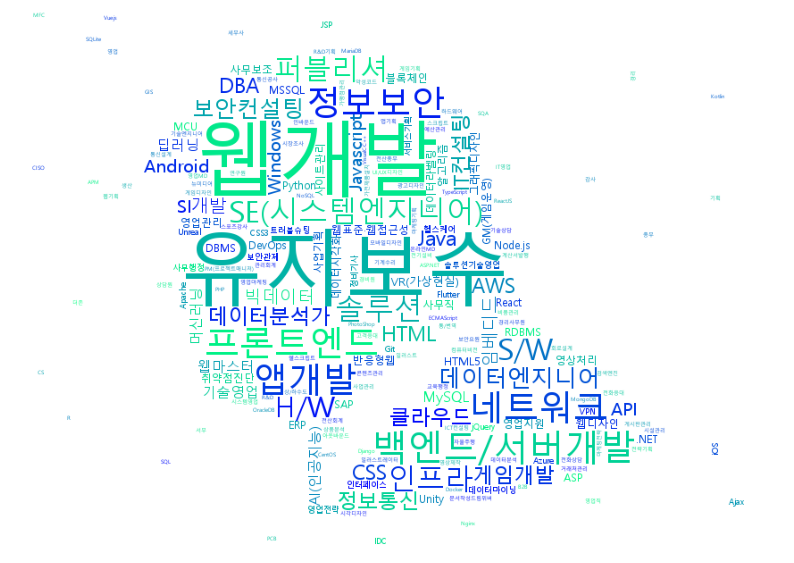

In [210]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path = 'C:\WINDOWS\FONTS\MALGUN.TTF',background_color='white',colormap='winter', relative_scaling=0.1, mask = mask_arr)

cloud = wc.generate_from_frequencies(dict(most_50))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show